# Đọc dữ liệu

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Yêu cầu 1.3

In [40]:
data = pd.read_csv('data/train_mean.csv')

In [41]:
print('Số dòng:', data.shape[0])
print('Các cột:')
print(np.array(data.columns))

Số dòng: 1536
Các cột:
['Make' 'Model' 'Price' 'Year' 'Kilometer' 'Fuel Type' 'Transmission'
 'Location' 'Color' 'Owner' 'Seller Type' 'Engine' 'Drivetrain' 'Length'
 'Width' 'Height' 'Seating Capacity' 'Fuel Tank Capacity' 'Max Power BHP'
 'Max Power RPM' 'Max Torque Nm' 'Max Torque RPM']


In [42]:
print('5 Dòng đầu tiên của data:')
data.head()

5 Dòng đầu tiên của data:


,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,...,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,Max Power BHP,Max Power RPM,Max Torque Nm,Max Torque RPM
0,BMW,X1 sDrive20d xLine,2.747496,0.823529,2.505654,Diesel,Automatic,Surat,Black,First,...,RWD,4454.0,2044.0,1545.0,0.500000,63.0,184.0,4000.0,350.0,1750.0
1,Mahindra,XUV500 W4 1.99,2.680499,0.852941,2.535779,Diesel,Manual,Muzaffurpur,Silver,First,...,FWD,4585.0,1890.0,1785.0,0.833333,70.0,138.0,3750.0,320.0,1600.0
2,Mercedes-Benz,GLS 400d 4MATIC,2.854902,0.970588,2.197969,Diesel,Automatic,Delhi,White,First,...,AWD,5207.0,2157.0,1823.0,0.833333,90.0,326.0,3600.0,700.0,1200.0
3,Toyota,Fortuner 2.8 4x2 AT [2016-2020],2.776829,0.911765,2.501291,Diesel,Automatic,Mumbai,White,First,...,RWD,4795.0,1855.0,1835.0,0.833333,80.0,174.0,3400.0,450.0,1600.0
4,Maruti Suzuki,Vitara Brezza ZDi+ Dual Tone [2017-2018],2.665089,0.823529,2.473089,Diesel,Manual,Delhi,Blue,Second,...,FWD,3995.0,1790.0,1640.0,0.500000,48.0,89.0,4000.0,200.0,1750.0


# Data preprocessing

## Encoding categorical features

In [44]:
list(data.select_dtypes(include=['object']).columns)

['Make',
 'Model',
 'Fuel Type',
 'Transmission',
 'Location',
 'Color',
 'Owner',
 'Seller Type',
 'Drivetrain']

In [45]:
# Model (drop)
data.drop(columns=['Model'], inplace=True)

In [46]:
# Make (target encoding)
# mean_price_by_make = data.groupby("Make")["Price"].count()
# data["Make_Encoded"] = data["Make"].map(mean_price_by_make)
# data.drop(columns='Make', inplace=True)

In [47]:
# Fule type (one-hot encoding)
threshold = 50
rare = data['Fuel Type'].value_counts()[lambda x: x < threshold].index
data['Fuel Type'] = data['Fuel Type'].apply(lambda x: x if x not in rare else 'Other')
data = pd.get_dummies(data, columns=["Fuel Type"], drop_first=True)

In [48]:
# Owner (Ordinal encoding)
data["Owner"] = data["Owner"].map({
    "UnRegistered Car": 0,
    "First": 1,
    "Second": 2,
    "Third": 3,
    "Fourth": 4,
    "4 or More": 4
})

In [49]:
# Drivetrain (one-hot encoding)
data = pd.get_dummies(data, columns=["Drivetrain"], drop_first=True)

In [50]:
# Transmission (one-hot encoding)
data = pd.get_dummies(data, columns=["Transmission"], drop_first=True)

In [51]:
# Color (one-hot encoding)
data = pd.get_dummies(data, columns=["Color"], drop_first=True)

In [52]:
# Color (one-hot encoding)
data = pd.get_dummies(data, columns=["Seller Type"], drop_first=True)

# Visualizing

## Hiển thị các Correlation có abs > 0.3

In [ ]:
# drop Kilometer = 2e6
data = data.drop(data[data["Kilometer"] == 2e6].index)

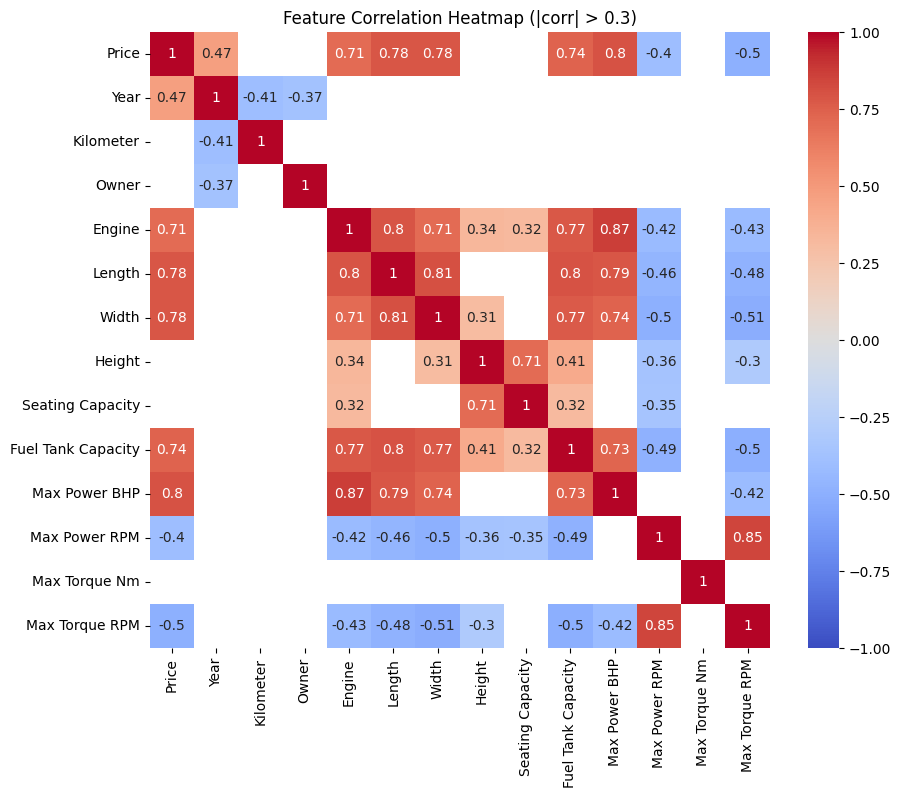

In [54]:
numeric_data = data.select_dtypes(include=['number'])

# Compute correlation
corr_matrix = numeric_data.corr()
filtered_corr = corr_matrix[abs(corr_matrix) > 0.3]
plt.figure(figsize=(10, 8))
sns.heatmap(filtered_corr, cmap="coolwarm", vmin=-1, vmax=1, annot=True)
plt.title("Feature Correlation Heatmap (|corr| > 0.3)")
plt.show()

# Visualize từng biến với Price

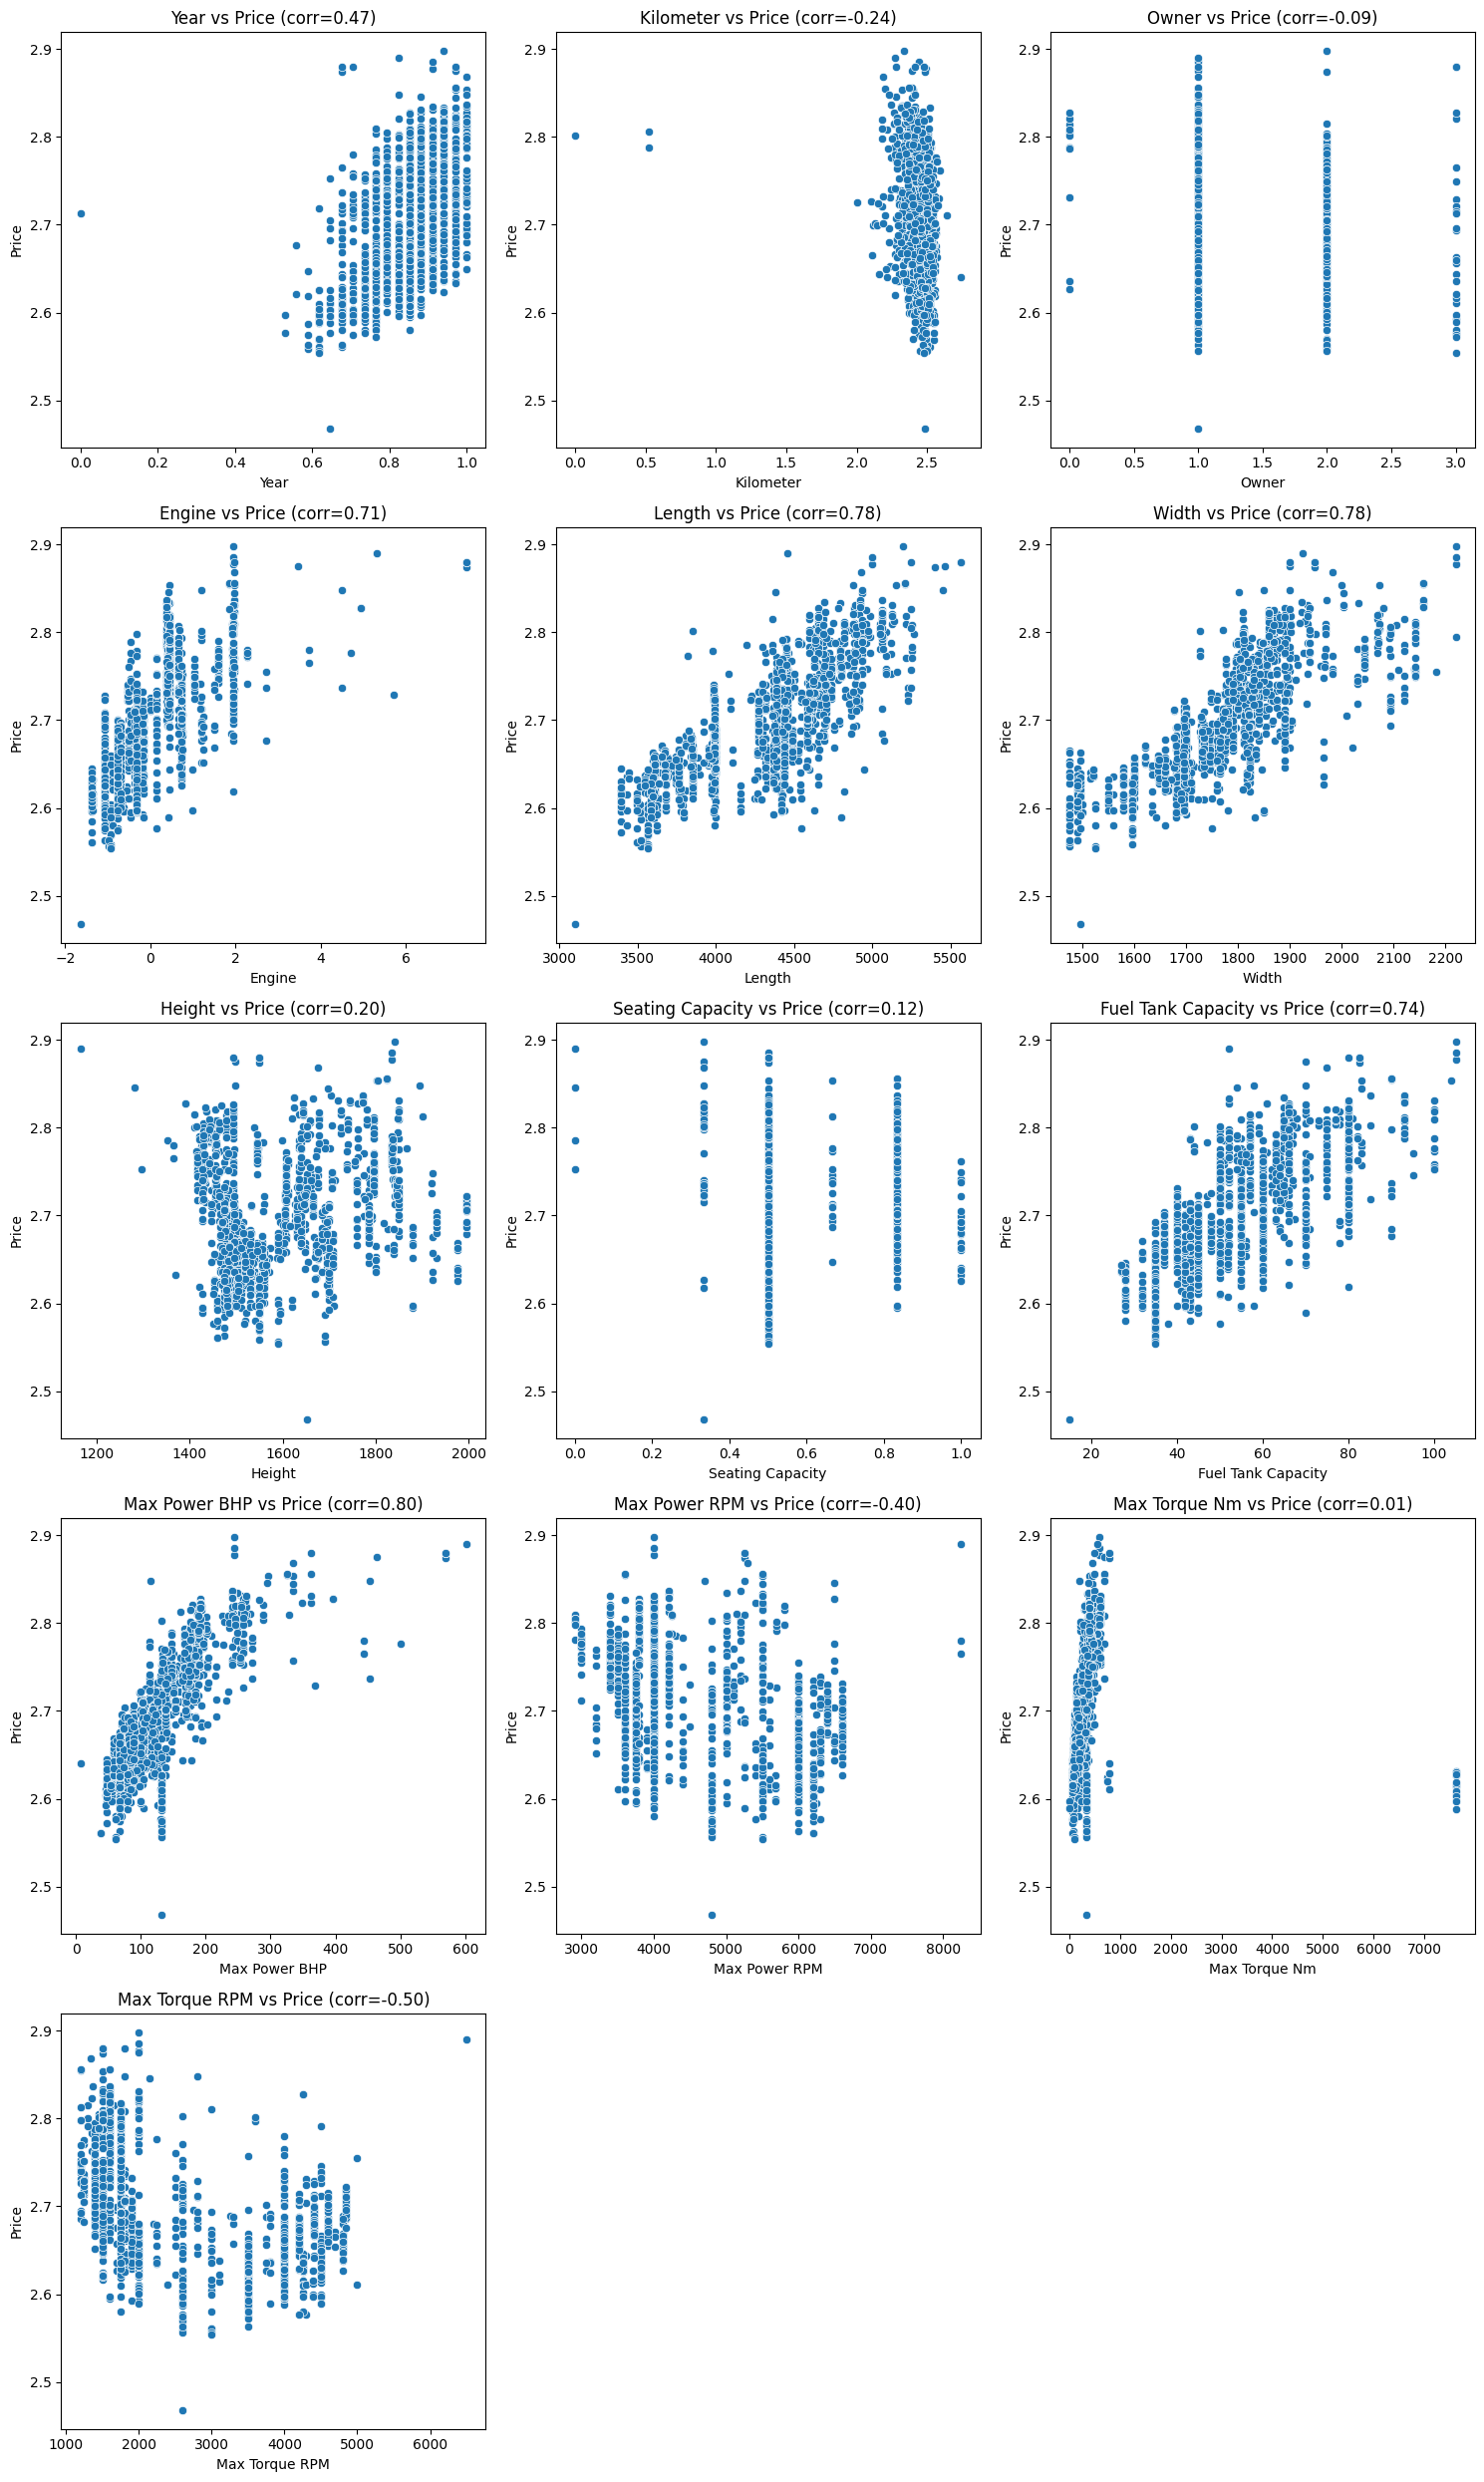

In [55]:
import math
correlations = numeric_data.corr()["Price"]
num_cols = [col for col in numeric_data.columns if col != "Price"]

num_plots = len(num_cols)
cols_per_row = 3  
num_rows = math.ceil(num_plots / cols_per_row) 

fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(5 * cols_per_row, 5 * num_rows))

axes = axes.flatten()

for i, col in enumerate(num_cols):
    corr_value = correlations[col]
    sns.scatterplot(x=numeric_data[col], y=numeric_data["Price"], ax=axes[i])
    axes[i].set_title(f"{col} vs Price (corr={corr_value:.2f})")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Price")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()